In [1]:

#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

In [2]:
#Installing and importing all the required libraries
! pip install beautifulsoup4

     |████████████████████████████████| 122kB 6.1MB/s eta 0:00:01


In [3]:
! pip install lxml

     |████████████████████████████████| 5.5MB 6.7MB/s eta 0:00:01


In [4]:
! pip install html5lib

In [5]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# for webscraping import Beautiful Soup 
from bs4 import BeautifulSoup

import xml

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.12.5          |   py36h5fab9bb_1         143 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.1.0                |     pyhd3deb0d_0          64 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         240 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.1.0-pyhd3deb0d_0

The following packages will be UPDATED:

  certifi                          2020.12.5-py36h5fab9bb_0 --> 2020.12.5-py36h5fab9bb_1



geopy-2.1.0          | 64 KB     

In [6]:
#getting the data from wikipedia
url = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(url,'lxml')

In [7]:
#create pandas dataframe
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_London_boroughs')[0]
df.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [8]:
df.drop('Inner',axis=1,inplace=True)
df.head()

,Borough,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [10]:
df.drop('Status',axis=1,inplace=True)
df

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029,51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W,11
6,Croydon,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,386710,51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W,19
7,Ealing,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,341806,51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W,13
8,Enfield,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,333794,51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W,30
9,Greenwich [note 2],Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,287942,51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E,22


In [11]:
df["Borough"] = df["Borough"].str.replace("\n","")
df["Borough"] = df["Borough"].str.replace(" \[note 1\]","")
df["Borough"] = df["Borough"].str.replace(" \[note 2\]","")
df["Borough"] = df["Borough"].str.replace(" \[note 3\]","")
df["Borough"] = df["Borough"].str.replace(" \[note 4\]","")
df["Local authority"] = df["Local authority"].str.replace("\n","")
df["Political control"] = df["Political control"].str.replace("\n","")
df["Headquarters"] = df["Headquarters"].str.replace("\n","")
df.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [12]:
df.iloc[0,6]= '51.5607°N 0.1557°E'
df.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,51.5607°N 0.1557°E,25
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


In [13]:
from geopy.geocoders import Nominatim

In [14]:
geolocator=Nominatim(user_agent="London_explorer")

In [15]:
###change the coordinates in the right format
df['Co-ordinates']=df['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df.head()

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,"(51.5541171, 0.15050434261994267)",25
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,"(51.65309, -0.2002261)",31
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,"(39.9692378, -82.936864)",23
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,"(32.9373463, -87.1647184)",12
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,"(51.4028046, 0.0148142)",20


In [16]:
###get the list of borough into the previous table 
list_borough=df.Borough.unique().tolist()

In [21]:
#part2
#getting the house pricing of London to estimate what are the most wheathiest neighbourhoods
df_2 = pd.read_csv('land-registry-house-prices-borough.csv')
df_2.head()

,Code,Area,Year,Measure,Value
0,E09000001,City of London,Year ending Dec 1995,Median,"105,000"
1,E09000002,Barking and Dagenham,Year ending Dec 1995,Median,"49,000"
2,E09000003,Barnet,Year ending Dec 1995,Median,"85,125"
3,E09000004,Bexley,Year ending Dec 1995,Median,"62,000"
4,E09000005,Brent,Year ending Dec 1995,Median,"68,000"


In [22]:
#### just looking at most recent data and the Mean values
df_2=df_2.loc[df_2['Year'] == 'Year ending Dec 2017']
df_2_mean=df_2.loc[df_2['Measure'] == 'Mean']
df_2_mean.head()

,Code,Area,Year,Measure,Value
7965,E09000001,City of London,Year ending Dec 2017,Mean,"950,760"
7966,E09000002,Barking and Dagenham,Year ending Dec 2017,Mean,"301,518"
7967,E09000003,Barnet,Year ending Dec 2017,Mean,"667,593"
7968,E09000004,Bexley,Year ending Dec 2017,Mean,"357,779"
7969,E09000005,Brent,Year ending Dec 2017,Mean,"578,705"


In [23]:
mask = df_2_mean['Area'].apply(lambda x: np.intersect1d(x, list_borough).size > 0)
df_2_LDN=df_2_mean[mask]
df_2_LDN

,Code,Area,Year,Measure,Value
7966,E09000002,Barking and Dagenham,Year ending Dec 2017,Mean,"301,518"
7967,E09000003,Barnet,Year ending Dec 2017,Mean,"667,593"
7968,E09000004,Bexley,Year ending Dec 2017,Mean,"357,779"
7969,E09000005,Brent,Year ending Dec 2017,Mean,"578,705"
7970,E09000006,Bromley,Year ending Dec 2017,Mean,"502,623"
7971,E09000007,Camden,Year ending Dec 2017,Mean,"1,099,876"
7972,E09000008,Croydon,Year ending Dec 2017,Mean,"399,645"
7973,E09000009,Ealing,Year ending Dec 2017,Mean,"578,110"
7974,E09000010,Enfield,Year ending Dec 2017,Mean,"463,806"
7975,E09000011,Greenwich,Year ending Dec 2017,Mean,"462,820"


In [24]:
df_2_LDN=df_2_LDN.reset_index()

<AxesSubplot:xlabel='Area'>

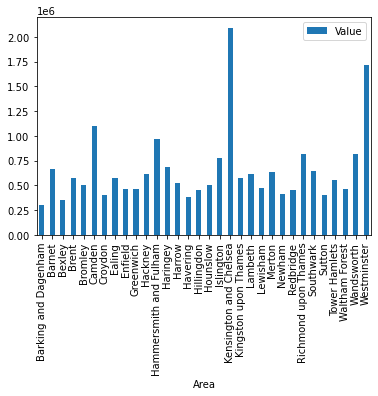

In [25]:
import matplotlib.pyplot as plt
df_2_LDN['Value'] = df_2_LDN['Value'].str.replace(',', '').astype(float)
df_2_LDN.plot.bar(x='Area',y='Value')

In [26]:
#update the first table with the new ones
df3=df.assign(Value=df_2_LDN['Value'])
df3

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map,Value
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,"(51.5541171, 0.15050434261994267)",25,301518.0
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,"(51.65309, -0.2002261)",31,667593.0
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,"(39.9692378, -82.936864)",23,357779.0
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,"(32.9373463, -87.1647184)",12,578705.0
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,"(51.4028046, 0.0148142)",20,502623.0
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029,"(39.9448402, -75.1198911)",11,1099876.0
6,Croydon,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,386710,"(51.3713049, -0.101957)",19,399645.0
7,Ealing,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,341806,"(51.5126553, -0.3051952)",13,578110.0
8,Enfield,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,333794,"(51.6520851, -0.0810175)",30,463806.0
9,Greenwich,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,287942,"(51.4820845, -0.0045417)",22,462820.0


In [27]:
df3['Area (sq mi)']=df3['Area (sq mi)'].astype('float')
df3['Population (2019 est)[1]']=df3['Population (2019 est)[1]'].astype('float')
df3['Value']=df3['Value'].astype('float')
df3

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map,Value
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906.0,"(51.5541171, 0.15050434261994267)",25,301518.0
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896.0,"(51.65309, -0.2002261)",31,667593.0
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287.0,"(39.9692378, -82.936864)",23,357779.0
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771.0,"(32.9373463, -87.1647184)",12,578705.0
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336.0,"(51.4028046, 0.0148142)",20,502623.0
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029.0,"(39.9448402, -75.1198911)",11,1099876.0
6,Croydon,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,386710.0,"(51.3713049, -0.101957)",19,399645.0
7,Ealing,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,341806.0,"(51.5126553, -0.3051952)",13,578110.0
8,Enfield,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,333794.0,"(51.6520851, -0.0810175)",30,463806.0
9,Greenwich,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,287942.0,"(51.4820845, -0.0045417)",22,462820.0


In [28]:
df3.dtypes

Borough                      object
Local authority              object
Political control            object
Headquarters                 object
Area (sq mi)                float64
Population (2019 est)[1]    float64
Co-ordinates                 object
Nr. in map                    int64
Value                       float64
dtype: object

In [29]:
###to check the most dense populated area I calculated the ratio between the population and the area
df3['Ratio']=df3['Population (2019 est)[1]']/df3['Area (sq mi)']
df3

,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map,Value,Ratio
0,Barking and Dagenham,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906.0,"(51.5541171, 0.15050434261994267)",25,301518.0,15283.991385
1,Barnet,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896.0,"(51.65309, -0.2002261)",31,667593.0,11821.319797
2,Bexley,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287.0,"(39.9692378, -82.936864)",23,357779.0,10619.632164
3,Brent,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771.0,"(32.9373463, -87.1647184)",12,578705.0,19746.766467
4,Bromley,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336.0,"(51.4028046, 0.0148142)",20,502623.0,5732.896326
5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029.0,"(39.9448402, -75.1198911)",11,1099876.0,32146.309524
6,Croydon,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,386710.0,"(51.3713049, -0.101957)",19,399645.0,11574.678240
7,Ealing,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,341806.0,"(51.5126553, -0.3051952)",13,578110.0,15942.444030
8,Enfield,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,333794.0,"(51.6520851, -0.0810175)",30,463806.0,10516.509137
9,Greenwich,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,287942.0,"(51.4820845, -0.0045417)",22,462820.0,15751.750547


In [31]:
###sort by richest borough and select the top 10
df3=df3.sort_values(by=['Value'], ascending=False)
dftop10=df3.head(n=10)
####then select the 5 most densly populated
dftop5=dftop10.sort_values(by=['Ratio'], ascending=False)
dftop5=dftop5.head(n=5)
dftop5=dftop5.reset_index()
dftop5

,index,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map,Value,Ratio
0,17,Islington,Islington London Borough Council,Labour,"Customer Centre, 222 Upper Street",5.74,242467.0,"(51.5384287, -0.0999051)",10,778290.0,42241.637631
1,18,Kensington and Chelsea,Kensington and Chelsea London Borough Council,Conservative,"The Town Hall, Hornton Street",4.68,156129.0,"(51.4875417, -0.1682205)",3,2092485.0,33360.897436
2,5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029.0,"(39.9448402, -75.1198911)",11,1099876.0,32146.309524
3,31,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317.0,"(51.5004439, -0.1265398)",2,1718124.0,31521.954162
4,11,Hammersmith and Fulham,Hammersmith and Fulham London Borough Council,Labour,"Town Hall, King Street",6.33,185143.0,"(51.4920377, -0.2236401)",4,972231.0,29248.499210


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Borough'>

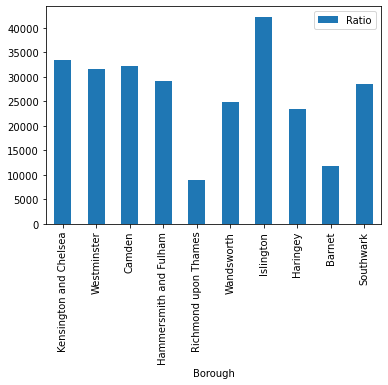

In [32]:
dftop10['Ratio']=dftop10['Ratio'].astype('float')
dftop10.plot.bar(x='Borough',y='Ratio')

In [33]:
#### we need to split the coordinates in two different columns
dftop5.rename(columns = {'Co-ordinates':'Coordinates'}, inplace = True) 

In [34]:
dftop5

,index,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio
0,17,Islington,Islington London Borough Council,Labour,"Customer Centre, 222 Upper Street",5.74,242467.0,"(51.5384287, -0.0999051)",10,778290.0,42241.637631
1,18,Kensington and Chelsea,Kensington and Chelsea London Borough Council,Conservative,"The Town Hall, Hornton Street",4.68,156129.0,"(51.4875417, -0.1682205)",3,2092485.0,33360.897436
2,5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029.0,"(39.9448402, -75.1198911)",11,1099876.0,32146.309524
3,31,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317.0,"(51.5004439, -0.1265398)",2,1718124.0,31521.954162
4,11,Hammersmith and Fulham,Hammersmith and Fulham London Borough Council,Labour,"Town Hall, King Street",6.33,185143.0,"(51.4920377, -0.2236401)",4,972231.0,29248.499210


In [35]:
##### I need to split the coordinates in two separate columns 
dftop5['Coordinates']=dftop5['Coordinates'].astype('str') ### set type as str
dftop5[['latitude','longitude']] = dftop5.Coordinates.str.split(",",expand=True,) ### split by","
dftop5["latitude"] = dftop5["latitude"].str.replace("(","") ## remove the parentesis
dftop5["latitude"] = dftop5["latitude"].str.replace(")","")
dftop5["longitude"] = dftop5["longitude"].str.replace("(","")
dftop5["longitude"] = dftop5["longitude"].str.replace(")","")
dftop5["longitude"] = dftop5["longitude"].str.replace("-75.1198911","-0.140556")#the longitude of Camden is wrong, so checked it on google and replaced it in the df. it should be -0.140556
dftop5["latitude"] = dftop5["latitude"].str.replace("39.944840","51.536388")# also the latitude
dftop5["longitude"]=dftop5["longitude"].astype('float')
dftop5["latitude"]=dftop5["latitude"].astype('float')
dftop5

,index,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude
0,17,Islington,Islington London Borough Council,Labour,"Customer Centre, 222 Upper Street",5.74,242467.0,"(51.5384287, -0.0999051)",10,778290.0,42241.637631,51.538429,-0.099905
1,18,Kensington and Chelsea,Kensington and Chelsea London Borough Council,Conservative,"The Town Hall, Hornton Street",4.68,156129.0,"(51.4875417, -0.1682205)",3,2092485.0,33360.897436,51.487542,-0.168220
2,5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029.0,"(39.9448402, -75.1198911)",11,1099876.0,32146.309524,51.536388,-0.140556
3,31,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317.0,"(51.5004439, -0.1265398)",2,1718124.0,31521.954162,51.500444,-0.126540
4,11,Hammersmith and Fulham,Hammersmith and Fulham London Borough Council,Labour,"Town Hall, King Street",6.33,185143.0,"(51.4920377, -0.2236401)",4,972231.0,29248.499210,51.492038,-0.223640


In [36]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


! pip install folium==0.5.0
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [37]:
address = 'London, UK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [38]:
map_london= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(dftop5["latitude"], dftop5["longitude"], dftop5["Borough"]):

    #label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
map_london

In [39]:
CLIENT_ID = 'WEWM2MT03UJFDTJBHL3Z00VUY0H3ADVOJKMJSMZ2BWJ4NCH4' # your Foursquare ID
CLIENT_SECRET = 'JTYMWDXXE34NH31UJXGBJDAYCUEUAWAW0435WEVBCFSIN4NA' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WEWM2MT03UJFDTJBHL3Z00VUY0H3ADVOJKMJSMZ2BWJ4NCH4
CLIENT_SECRET:JTYMWDXXE34NH31UJXGBJDAYCUEUAWAW0435WEVBCFSIN4NA


In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
london_venues = getNearbyVenues(names=dftop5['Borough'],
                                   latitudes=dftop5['latitude'],
                                   longitudes=dftop5['longitude']
                                  )

Islington
Kensington and Chelsea
Camden
Westminster
Hammersmith and Fulham


In [42]:
print(london_venues.shape)
london_venues.head()

(150, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Islington,51.538429,-0.099905,Steve Hatt,51.538588,-0.099041,Fish Market
1,Islington,51.538429,-0.099905,Ottolenghi,51.539716,-0.102314,Mediterranean Restaurant
2,Islington,51.538429,-0.099905,The Life Centre Islington,51.538056,-0.099171,Yoga Studio
3,Islington,51.538429,-0.099905,Almeida Theatre,51.539620,-0.102845,Theater
4,Islington,51.538429,-0.099905,Planet Organic,51.537967,-0.099676,Organic Grocery


In [43]:
#Let's check how many venues were returned for each neighborhood
london_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
Camden,30,30,30,30,30,30
Hammersmith and Fulham,30,30,30,30,30,30
Islington,30,30,30,30,30,30
Kensington and Chelsea,30,30,30,30,30,30
Westminster,30,30,30,30,30,30


In [44]:
#### Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(london_venues['Venue Category'].unique())))

There are 78 uniques categories.


In [45]:
###### Create a datadrame to focus only on restaurants
LND_5_borough_restaurants=london_venues[london_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
LND_5_borough_restaurants

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Islington,51.538429,-0.099905,Ottolenghi,51.539716,-0.102314,Mediterranean Restaurant
1,Islington,51.538429,-0.099905,Zaffrani,51.539255,-0.101202,Indian Restaurant
2,Islington,51.538429,-0.099905,Saponara,51.536875,-0.096121,Italian Restaurant
3,Islington,51.538429,-0.099905,El Inca Plebeyo,51.539989,-0.096824,Latin American Restaurant
4,Islington,51.538429,-0.099905,Afghan Kitchen,51.535760,-0.102973,Afghan Restaurant
5,Islington,51.538429,-0.099905,Sushi Show,51.535351,-0.103423,Sushi Restaurant
6,Islington,51.538429,-0.099905,Zen Mondo,51.536986,-0.103210,Japanese Restaurant
7,Kensington and Chelsea,51.487542,-0.168220,The Ivy Chelsea Garden,51.487035,-0.169379,English Restaurant
8,Kensington and Chelsea,51.487542,-0.168220,Phật Phúc Noodle Bar,51.487620,-0.169044,Vietnamese Restaurant
9,Kensington and Chelsea,51.487542,-0.168220,Casa Manolo,51.487302,-0.169164,Tapas Restaurant


<AxesSubplot:xlabel='Borough'>

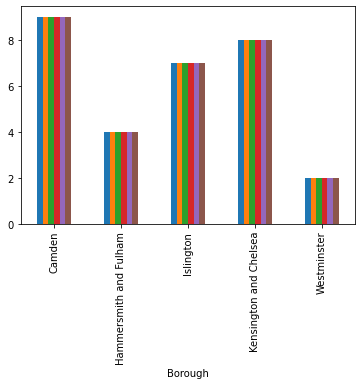

In [46]:
LND_5_borough_restaurants.groupby('Borough').count().plot(kind='bar',legend=False)

In [47]:
### Let's map all the restaurants 
map_restaurant= folium.Map(location=[latitude, longitude], zoom_start=11)
##set color scheme for the venues based on the Borough
Boroughs=['Islington','Kensington and Chelsea','Hammersmith and Fulham','Westminster','Camden']

x=np.arange(len(Boroughs))

rainbow=['#00ff00','#ff00ff','#0000ff','#ffa500','#ff0000']
# add markers to map
for lat, lng, label, distr in zip(LND_5_borough_restaurants["Venue Latitude"],
                           LND_5_borough_restaurants["Venue Longitude"], 
                           LND_5_borough_restaurants["Venue"],
                           LND_5_borough_restaurants["Borough"]):

    
    label = folium.Popup(label+ ' '+str(distr), parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=7,
    popup=label,
    color=rainbow[Boroughs.index(distr)-1],
    fill=True,
    fill_color=rainbow[Boroughs.index(distr)-1],
    fill_opacity=0.7,
    parse_html=False).add_to(map_london)  
map_london

In [48]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()

,Borough,Afghan Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Bakery,Bar,Beer Bar,Bookstore,Boutique,Boxing Gym,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Canal,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Creperie,Deli / Bodega,Dessert Shop,English Restaurant,Event Space,Falafel Restaurant,Fish & Chips Shop,Fish Market,Food Truck,French Restaurant,Fruit & Vegetable Store,Garden,Garden Center,Gift Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Historic Site,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Latin American Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Monument / Landmark,Movie Theater,Music Venue,Organic Grocery,Outdoor Sculpture,Park,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Record Shop,Restaurant,Sandwich Place,Scenic Lookout,Snack Place,Spa,Sporting Goods Shop,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Islington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Islington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Islington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Islington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,Islington,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,Afghan Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Bakery,Bar,Beer Bar,Bookstore,Boutique,Boxing Gym,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Canal,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Creperie,Deli / Bodega,Dessert Shop,English Restaurant,Event Space,Falafel Restaurant,Fish & Chips Shop,Fish Market,Food Truck,French Restaurant,Fruit & Vegetable Store,Garden,Garden Center,Gift Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Historic Site,Hobby Shop,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Juice Bar,Latin American Restaurant,Lounge,Mediterranean Restaurant,Mexican Restaurant,Monument / Landmark,Movie Theater,Music Venue,Organic Grocery,Outdoor Sculpture,Park,Pizza Place,Playground,Plaza,Portuguese Restaurant,Pub,Record Shop,Restaurant,Sandwich Place,Scenic Lookout,Snack Place,Spa,Sporting Goods Shop,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store,Yoga Studio
0,Camden,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.100000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.066667,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333
1,Hammersmith and Fulham,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.000000,0.033333,0.000000,0.066667,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.133333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.000000
2,Islington,0.033333,0.000000,0.000000,0.033333,0.066667,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133333,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.033333
3,Kensington and Chelsea,0.000000,0.000000,0.033333,0.000000,0.100000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333,0.033333,0.033333,0.000000,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.066667,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000
4,Westminster,0.000000,0.000000

In [50]:
london_grouped.shape

(5, 79)

In [51]:
#### Let's print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in london_grouped['Borough']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Camden----
              venue  freq
0       Coffee Shop  0.10
1       Music Venue  0.07
2          Tea Room  0.07
3  Greek Restaurant  0.03
4       Record Shop  0.03


----Hammersmith and Fulham----
                 venue  freq
0                  Pub  0.13
1          Coffee Shop  0.07
2            Gift Shop  0.03
3  Japanese Restaurant  0.03
4          Pizza Place  0.03


----Islington----
               venue  freq
0                Pub  0.13
1       Burger Joint  0.07
2            Theater  0.07
3             Bakery  0.07
4  Afghan Restaurant  0.03


----Kensington and Chelsea----
                 venue  freq
0               Bakery  0.10
1       Ice Cream Shop  0.07
2    French Restaurant  0.07
3  Japanese Restaurant  0.07
4           Playground  0.03


----Westminster----
               venue  freq
0              Hotel  0.13
1              Plaza  0.10
2               Park  0.07
3             Garden  0.07
4  Outdoor Sculpture  0.07




In [52]:
#### let's put it in a dataframe
#first let's put them in descending orders
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#Now let's create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Camden,Coffee Shop,Tea Room,Music Venue,Yoga Studio,Falafel Restaurant,Lounge,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Canal
1,Hammersmith and Fulham,Pub,Coffee Shop,Hotel,Concert Hall,Plaza,Café,Pizza Place,Gift Shop,Clothing Store,Creperie
2,Islington,Pub,Bakery,Theater,Burger Joint,Yoga Studio,Hobby Shop,Mediterranean Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant
3,Kensington and Chelsea,Bakery,Japanese Restaurant,French Restaurant,Ice Cream Shop,Gift Shop,English Restaurant,Creperie,Coffee Shop,Garden Center,Park
4,Westminster,Hotel,Plaza,Garden,Historic Site,Coffee Shop,Outdoor Sculpture,Park,Bar,Tea Room,Concert Hall


In [53]:
#### let's cluster

from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 3, 1, 4, 0], dtype=int32)

In [54]:
###Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = dftop5

# merge manhattan_grouped with dftop5 to add latitude/longitude for each neighborhood
london_merged = london_merged.join(neighborhoods_venues_sorted.set_index('Borough'), on='Borough')

london_merged.head() # check the last columns!

,index,Borough,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17,Islington,Islington London Borough Council,Labour,"Customer Centre, 222 Upper Street",5.74,242467.0,"(51.5384287, -0.0999051)",10,778290.0,42241.637631,51.538429,-0.099905,1,Pub,Bakery,Theater,Burger Joint,Yoga Studio,Hobby Shop,Mediterranean Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant
1,18,Kensington and Chelsea,Kensington and Chelsea London Borough Council,Conservative,"The Town Hall, Hornton Street",4.68,156129.0,"(51.4875417, -0.1682205)",3,2092485.0,33360.897436,51.487542,-0.168220,4,Bakery,Japanese Restaurant,French Restaurant,Ice Cream Shop,Gift Shop,English Restaurant,Creperie,Coffee Shop,Garden Center,Park
2,5,Camden,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,270029.0,"(39.9448402, -75.1198911)",11,1099876.0,32146.309524,51.536388,-0.140556,2,Coffee Shop,Tea Room,Music Venue,Yoga Studio,Falafel Restaurant,Lounge,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Canal
3,31,Westminster,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317.0,"(51.5004439, -0.1265398)",2,1718124.0,31521.954162,51.500444,-0.126540,0,Hotel,Plaza,Garden,Historic Site,Coffee Shop,Outdoor Sculpture,Park,Bar,Tea Room,Concert Hall
4,11,Hammersmith and Fulham,Hammersmith and Fulham London Borough Council,Labour,"Town Hall, King Street",6.33,185143.0,"(51.4920377, -0.2236401)",4,972231.0,29248.499210,51.492038,-0.223640,3,Pub,Coffee Shop,Hotel,Concert Hall,Plaza,Café,Pizza Place,Gift Shop,Clothing Store,Creperie


In [55]:
###let's visualise the clusters
# create map
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['latitude'], london_merged['longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [56]:
###examining each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.
#In Westminster area the most common venues are Hotels
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Borough,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Westminster,8.29,261317.0,"(51.5004439, -0.1265398)",2,1718124.0,31521.954162,51.500444,-0.12654,0,Hotel,Plaza,Garden,Historic Site,Coffee Shop,Outdoor Sculpture,Park,Bar,Tea Room,Concert Hall


In [61]:
#In Islington area the most common venues are Pubs
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Borough,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Islington,5.74,242467.0,"(51.5384287, -0.0999051)",10,778290.0,42241.637631,51.538429,-0.099905,1,Pub,Bakery,Theater,Burger Joint,Yoga Studio,Hobby Shop,Mediterranean Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant


In [58]:
#In Camden area the most common venues are Coffee shops
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Borough,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Camden,8.4,270029.0,"(39.9448402, -75.1198911)",11,1099876.0,32146.309524,51.536388,-0.140556,2,Coffee Shop,Tea Room,Music Venue,Yoga Studio,Falafel Restaurant,Lounge,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Canal


In [59]:
#In Hammersmith and Fulham area the most common venues are Pubs
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Borough,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Hammersmith and Fulham,6.33,185143.0,"(51.4920377, -0.2236401)",4,972231.0,29248.49921,51.492038,-0.22364,3,Pub,Coffee Shop,Hotel,Concert Hall,Plaza,Café,Pizza Place,Gift Shop,Clothing Store,Creperie


In [62]:
#In Kensington and Chelsea area the most common venues are Bakeries
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[1] + list(range(5, london_merged.shape[1]))]]

,Borough,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Kensington and Chelsea,4.68,156129.0,"(51.4875417, -0.1682205)",3,2092485.0,33360.897436,51.487542,-0.16822,4,Bakery,Japanese Restaurant,French Restaurant,Ice Cream Shop,Gift Shop,English Restaurant,Creperie,Coffee Shop,Garden Center,Park


In [70]:
london_merged

,index,Borough,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Coordinates,Nr. in map,Value,Ratio,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,17,Islington,Labour,"Customer Centre, 222 Upper Street",5.74,242467.0,"(51.5384287, -0.0999051)",10,778290.0,42241.637631,51.538429,-0.099905,1,Pub,Bakery,Theater,Burger Joint,Yoga Studio,Hobby Shop,Mediterranean Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant
1,18,Kensington and Chelsea,Conservative,"The Town Hall, Hornton Street",4.68,156129.0,"(51.4875417, -0.1682205)",3,2092485.0,33360.897436,51.487542,-0.168220,4,Bakery,Japanese Restaurant,French Restaurant,Ice Cream Shop,Gift Shop,English Restaurant,Creperie,Coffee Shop,Garden Center,Park
2,5,Camden,Labour,"Camden Town Hall, Judd Street",8.40,270029.0,"(39.9448402, -75.1198911)",11,1099876.0,32146.309524,51.536388,-0.140556,2,Coffee Shop,Tea Room,Music Venue,Yoga Studio,Falafel Restaurant,Lounge,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Canal
3,31,Westminster,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,261317.0,"(51.5004439, -0.1265398)",2,1718124.0,31521.954162,51.500444,-0.126540,0,Hotel,Plaza,Garden,Historic Site,Coffee Shop,Outdoor Sculpture,Park,Bar,Tea Room,Concert Hall
4,11,Hammersmith and Fulham,Labour,"Town Hall, King Street",6.33,185143.0,"(51.4920377, -0.2236401)",4,972231.0,29248.499210,51.492038,-0.223640,3,Pub,Coffee Shop,Hotel,Concert Hall,Plaza,Café,Pizza Place,Gift Shop,Clothing Store,Creperie


In [73]:
london_merged.drop('index',axis=1,inplace=True)
london_merged.drop('Political control',axis=1,inplace=True)
london_merged.drop('Population (2019 est)[1]',axis=1,inplace=True)
london_merged.drop('Coordinates',axis=1,inplace=True)
london_merged.drop('Nr. in map',axis=1,inplace=True)
london_merged.drop('Cluster Labels',axis=1,inplace=True)
london_merged.drop('Headquarters',axis=1,inplace=True)
london_merged.drop('Area (sq mi)',axis=1,inplace=True)
london_merged.drop('Ratio',axis=1,inplace=True)
london_merged.drop('Value',axis=1,inplace=True)


KeyError: "['index'] not found in axis"

In [74]:
london_merged

,Borough,Value,Ratio,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Islington,778290.0,42241.637631,51.538429,-0.099905,Pub,Bakery,Theater,Burger Joint,Yoga Studio,Hobby Shop,Mediterranean Restaurant,Latin American Restaurant,Japanese Restaurant,Italian Restaurant
1,Kensington and Chelsea,2092485.0,33360.897436,51.487542,-0.168220,Bakery,Japanese Restaurant,French Restaurant,Ice Cream Shop,Gift Shop,English Restaurant,Creperie,Coffee Shop,Garden Center,Park
2,Camden,1099876.0,32146.309524,51.536388,-0.140556,Coffee Shop,Tea Room,Music Venue,Yoga Studio,Falafel Restaurant,Lounge,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Canal
3,Westminster,1718124.0,31521.954162,51.500444,-0.126540,Hotel,Plaza,Garden,Historic Site,Coffee Shop,Outdoor Sculpture,Park,Bar,Tea Room,Concert Hall
4,Hammersmith and Fulham,972231.0,29248.499210,51.492038,-0.223640,Pub,Coffee Shop,Hotel,Concert Hall,Plaza,Café,Pizza Place,Gift Shop,Clothing Store,Creperie
